In [100]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

qreg = QuantumRegister(3, 'q');
creg = ClassicalRegister(3, 'c');
circuit = QuantumCircuit(qreg, creg)

In [101]:
# This is how you measure a specific qubit into a
# specific classical bit.
circuit.measure(0, 0)

In [102]:
qreg = QuantumRegister(2, 'q');
creg = ClassicalRegister(2, 'c');
circuit = QuantumCircuit(qreg, creg)
circuit.h(0)
circuit.cx(0, 1);
# This measurement of both qubits is crucial for
# plotting the results correctly.
circuit.measure([0,1], [0,1])

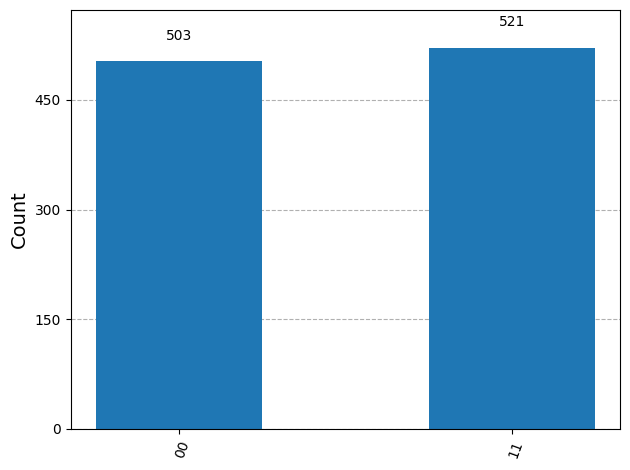

In [103]:
# Step 3: Run using Sampler and get results
sampler = Sampler()
job = sampler.run([circuit], shots=1024)
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

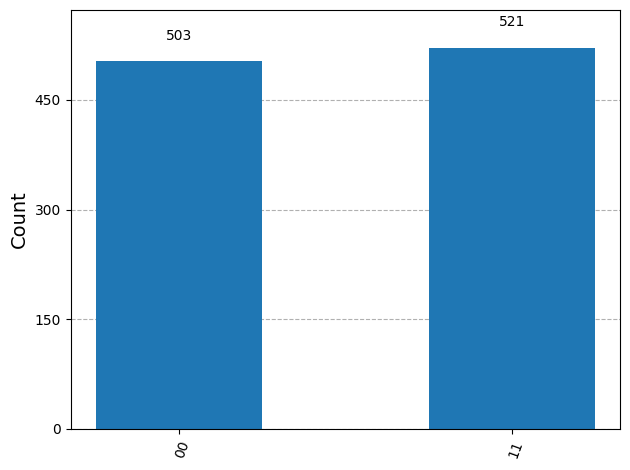

In [104]:
# Question 3
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.x(1)
circuit.measure_all()

# Run using Sample and get results
sampler = Sampler()
job = sampler.run([circuit], shots=1024)
result = job.result()[0]

# Extract data and plot histogram
count = result.data.meas.get_counts()
plot_histogram(counts)

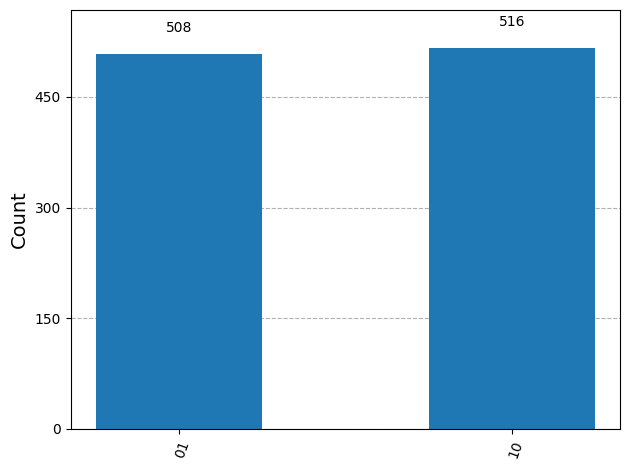

In [105]:
# Question 4
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.x(1)
circuit.measure_all()

# Run using Sampler and get results
sampler = Sampler()
job = sampler.run([circuit], shots=1024)
result = job.result()[0]
# Extract data and plot histogram
counts = result.data.meas.get_counts()
plot_histogram(counts)


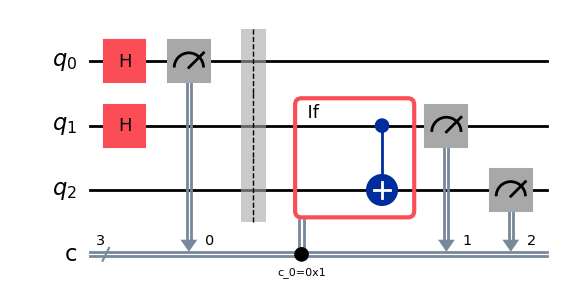

In [106]:
# Question 8
qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.h(0)
circuit.h(1)
circuit.measure(0,0)
circuit.barrier()
with circuit.if_test((creg[0], 1)):
	circuit.cx(1,2)
circuit.measure([1,2],[1,2])
circuit.draw('mpl')

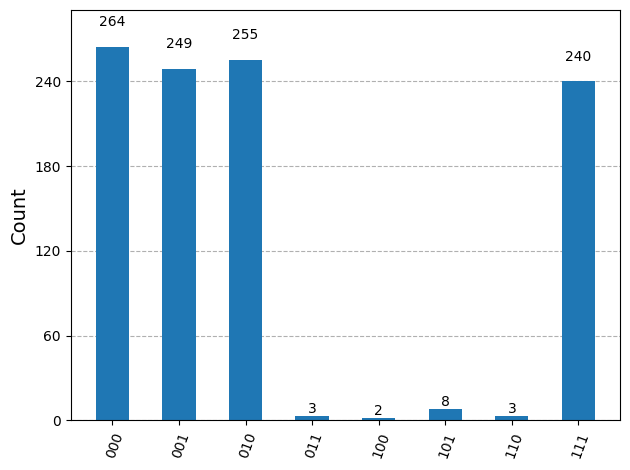

In [109]:
# Question 10
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler, SamplerOptions
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()
transpiled_circuit = transpile(circuit, backend)
sampler = Sampler(backend)
job = sampler.run([transpiled_circuit], shots=1024)
pub_result = job.result()[0]
counts = pub_result.data.c.get_counts()
plot_histogram(counts)



In [92]:
# Question 11
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

AttributeError: 'DataBin' object has no attribute 'meas'

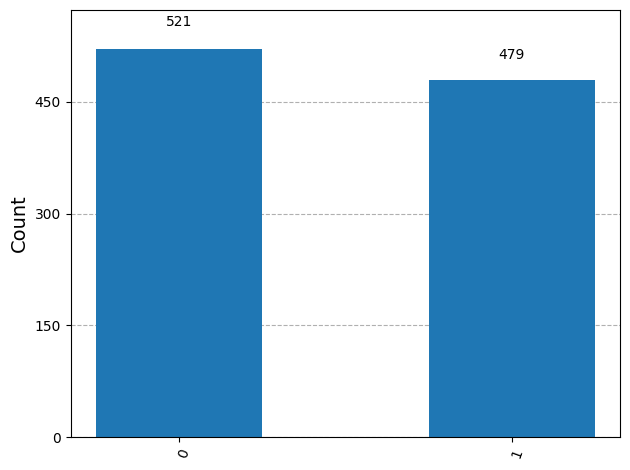

In [93]:
# Question 12
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0, 0)

sampler = Sampler()
job = sampler.run([circuit], shots=1000) # Notice that it's not 1024!!
result = job.result()[0]

counts = result.data.c.get_counts()
plot_histogram(counts)
